In [1]:
from models import VariationalAutoencoder, Autoencoder
from data_utils import CustomImageDataset
import torch
import os
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 
import numpy as np
from utils import test
from sklearn.metrics import confusion_matrix, classification_report

plt.style.use("ggplot")

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using device:', device)

Using device: cuda


In [3]:
transform = transforms.Compose(
    [transforms.ToPILImage(),
     transforms.Resize((28, 28)),
     transforms.ToTensor(),
     transforms.Normalize(mean=(0), std=(1))])

In [4]:
ae = Autoencoder(16).to(device) # GPU
ae.load_state_dict(torch.load("./autoencoders/AE"))
ae.eval()

Autoencoder(
  (encoder): Encoder(
    (linear1): Linear(in_features=2352, out_features=512, bias=True)
    (linear2): Linear(in_features=512, out_features=16, bias=True)
  )
  (decoder): Decoder(
    (linear1): Linear(in_features=16, out_features=512, bias=True)
    (linear2): Linear(in_features=512, out_features=2352, bias=True)
  )
)

In [5]:
vae = VariationalAutoencoder(16).to(device) # GPU
vae.load_state_dict(torch.load("./autoencoders/VAE"))
vae.eval()

VariationalAutoencoder(
  (encoder): VariationalEncoder(
    (linear1): Linear(in_features=2352, out_features=512, bias=True)
    (linear2): Linear(in_features=512, out_features=16, bias=True)
    (linear3): Linear(in_features=512, out_features=16, bias=True)
  )
  (decoder): Decoder(
    (linear1): Linear(in_features=16, out_features=512, bias=True)
    (linear2): Linear(in_features=512, out_features=2352, bias=True)
  )
)

## Test

In [6]:
test_data_path = "./homework_2_dataset/dataset/test"
test_dataset = CustomImageDataset(os.path.join(test_data_path, "annotation.txt"), os.path.join(test_data_path, "imgs"), transform=transform)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)

### AE

In [7]:
true, preds, l = test(ae, test_dataloader, device, 4)

In [8]:
thresolds, tp_rate, tn_rate = [], [], []
for thresh in range(10, 80, 1):
    tp, fp, tn, fn = 0, 0, 0, 0
    for loss, y in zip(l, true):
        if loss >= (thresh / 10):
            y_pred = 1
        else:
            y_pred = 0
        
        if y == 1 and y_pred == 1:
            tp += 1
        elif y == 1 and y_pred == 0:
            fn += 1
        elif y == 0 and y_pred == 1:
            fp += 1
        elif y == 0 and y_pred == 0:
            tn += 1
    
    thresolds.append(thresh / 10)
    tp_rate.append(tp / (tp + fn))
    tn_rate.append(tn / (tn + fp))
    print(f"threshold = {(thresh / 10):.2f}: True Positive Rate: {(tp / (tp + fn)):.2f}, True Negative Rate: {(tn / (tn + fp)):.2f}")

threshold = 1.00: True Positive Rate: 1.00, True Negative Rate: 0.12
threshold = 1.10: True Positive Rate: 1.00, True Negative Rate: 0.18
threshold = 1.20: True Positive Rate: 1.00, True Negative Rate: 0.26
threshold = 1.30: True Positive Rate: 1.00, True Negative Rate: 0.35
threshold = 1.40: True Positive Rate: 1.00, True Negative Rate: 0.40
threshold = 1.50: True Positive Rate: 1.00, True Negative Rate: 0.43
threshold = 1.60: True Positive Rate: 1.00, True Negative Rate: 0.47
threshold = 1.70: True Positive Rate: 1.00, True Negative Rate: 0.49
threshold = 1.80: True Positive Rate: 1.00, True Negative Rate: 0.51
threshold = 1.90: True Positive Rate: 1.00, True Negative Rate: 0.53
threshold = 2.00: True Positive Rate: 1.00, True Negative Rate: 0.56
threshold = 2.10: True Positive Rate: 1.00, True Negative Rate: 0.59
threshold = 2.20: True Positive Rate: 1.00, True Negative Rate: 0.62
threshold = 2.30: True Positive Rate: 0.99, True Negative Rate: 0.64
threshold = 2.40: True Positive Ra

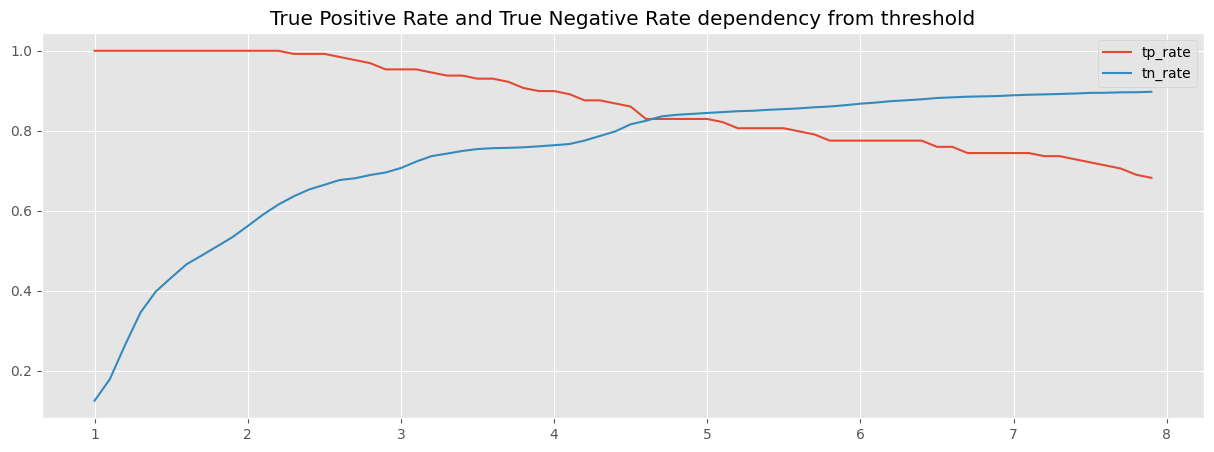

In [9]:
plt.figure(figsize=(15, 5))
plt.plot(thresolds, tp_rate, label = "tp_rate") 
plt.plot(thresolds, tn_rate, label = "tn_rate") 
plt.legend()
plt.title("True Positive Rate and True Negative Rate dependency from threshold")
plt.show()

### VAE

In [8]:
true, preds, l = test(vae, test_dataloader, device, 4, vae=True)

In [11]:
thresolds, tp_rate, tn_rate = [], [], []
for thresh in range(10, 200, 1):
    tp, fp, tn, fn = 0, 0, 0, 0
    for loss, y in zip(l, true):
        if loss >= (thresh / 10):
            y_pred = 1
        else:
            y_pred = 0
        
        if y == 1 and y_pred == 1:
            tp += 1
        elif y == 1 and y_pred == 0:
            fn += 1
        elif y == 0 and y_pred == 1:
            fp += 1
        elif y == 0 and y_pred == 0:
            tn += 1
    
    thresolds.append(thresh / 10)
    tp_rate.append(tp / (tp + fn))
    tn_rate.append(tn / (tn + fp))
    print(f"threshold = {(thresh / 10):.2f}: True Positive Rate: {(tp / (tp + fn)):.2f}, True Negative Rate: {(tn / (tn + fp)):.2f}")

threshold = 1.00: True Positive Rate: 1.00, True Negative Rate: 0.00
threshold = 1.10: True Positive Rate: 1.00, True Negative Rate: 0.00
threshold = 1.20: True Positive Rate: 1.00, True Negative Rate: 0.00
threshold = 1.30: True Positive Rate: 1.00, True Negative Rate: 0.00
threshold = 1.40: True Positive Rate: 1.00, True Negative Rate: 0.00
threshold = 1.50: True Positive Rate: 1.00, True Negative Rate: 0.00
threshold = 1.60: True Positive Rate: 1.00, True Negative Rate: 0.00
threshold = 1.70: True Positive Rate: 1.00, True Negative Rate: 0.00
threshold = 1.80: True Positive Rate: 1.00, True Negative Rate: 0.00
threshold = 1.90: True Positive Rate: 1.00, True Negative Rate: 0.00
threshold = 2.00: True Positive Rate: 1.00, True Negative Rate: 0.00
threshold = 2.10: True Positive Rate: 1.00, True Negative Rate: 0.00
threshold = 2.20: True Positive Rate: 1.00, True Negative Rate: 0.00
threshold = 2.30: True Positive Rate: 1.00, True Negative Rate: 0.00
threshold = 2.40: True Positive Ra

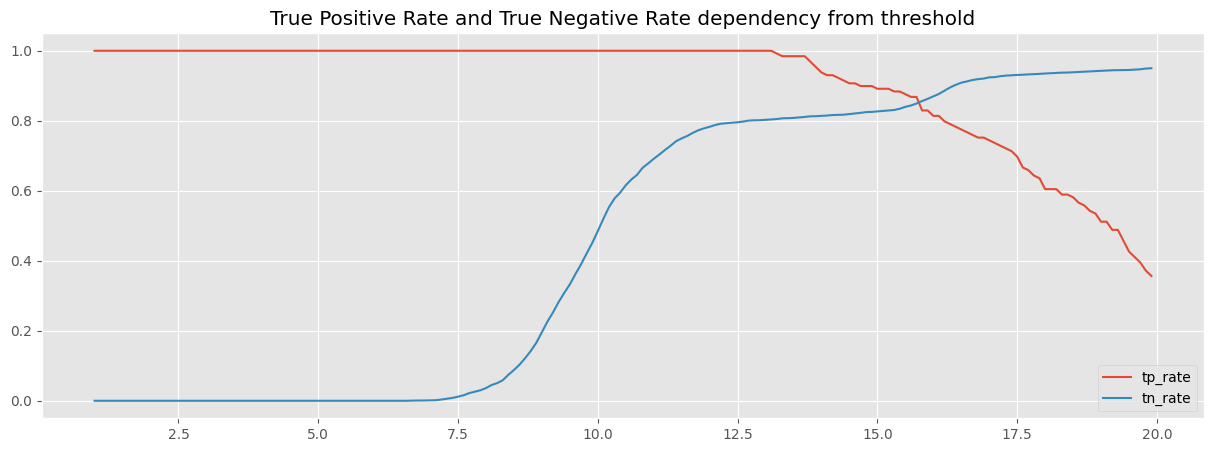

In [12]:
plt.figure(figsize=(15, 5))
plt.plot(thresolds, tp_rate, label = "tp_rate") 
plt.plot(thresolds, tn_rate, label = "tn_rate") 
plt.legend()
plt.title("True Positive Rate and True Negative Rate dependency from threshold")
plt.show()